<a href="https://colab.research.google.com/github/ern-arse/Portfolio-Data-Science/blob/master/Venue_composition_of_top_rated_beer_bars_in_Copenhagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Venue composition of top rated beer bars in Copenhagen**
## *Applied Data Science Capstone* Issued by Coursera



### **Introduction/ Business Problem**
If you have been working in the service industry, you have noticed that the success of a venue isn't entirely on what you can offer but in great part, the location. The venues around and how easy is to access would be a key factor to consider.

The aim of this project is to define the venue structure around the best rated beer bars in Copenhagen, Denmark. The insight might help to better decide in the future, a proper location to open a beer bar. 



### **Data**
The Data would be adquired using the Foursquare API. Firstly, it would be extracted the current data on Venues categorized as “Beer bars” in Copenhagen. Then, I would take the top 10 best rated ones and explore the neighboring venues, on a radius of 200 meters. The composition of the venues around the top bars would be analyzed and compared between them. 

### **Methods**

#### 1. Importing Libraries 

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Estoy usando la API de Foursquare y para hacer queries requiere que tengas una cuenta. Lo siguiente es mi ID para acceder.

#### 2. Using the Foursquare API to obtain all the "bar" venues in Copenhagen.

Setting the search query to request the data to Foursquare API:

In [ ]:
CLIENT_ID = 'RJPBQ4RM3LG331XLRL1W2TIIS0PDTCHWXXGXQGPPGTXLC0XD' # your Foursquare ID
CLIENT_SECRET = 'AA0LJWLADKRFLURPHQQIDB3YBV13M4V0XPKFRLVQUIGHCGVS' # your Foursquare Secret
VERSION = '20200606'
LIMIT = 1000 #limite de resultados
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RJPBQ4RM3LG331XLRL1W2TIIS0PDTCHWXXGXQGPPGTXLC0XD
CLIENT_SECRET:AA0LJWLADKRFLURPHQQIDB3YBV13M4V0XPKFRLVQUIGHCGVS


In [ ]:
address = 'Copenhagen, DK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

55.6867243 12.5700724


Search query of "bar" venues in a radius of 10,000 meters around Copenhagen, Denmark:

In [ ]:
search_query = 'bar'
radius = 10000
print(search_query + ' .... OK!')

bar .... OK!


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?client_id=RJPBQ4RM3LG331XLRL1W2TIIS0PDTCHWXXGXQGPPGTXLC0XD&client_secret=AA0LJWLADKRFLURPHQQIDB3YBV13M4V0XPKFRLVQUIGHCGVS&ll=55.6867243,12.5700724&v=20200606&query=bar&radius=10000&limit=1000'

In [ ]:
results = requests.get(url).json()
print(results['response']['venues'])

[{'id': '4b2436d9f964a520e66324e3', 'name': 'Harbo Bar', 'location': {'address': 'Blågårdsgade 2D', 'crossStreet': 'ved Nørrebrogade', 'lat': 55.687667929416556, 'lng': 12.559588135045614, 'labeledLatLngs': [{'label': 'display', 'lat': 55.687667929416556, 'lng': 12.559588135045614}], 'distance': 666, 'postalCode': '2200', 'cc': 'DK', 'city': 'København N', 'state': 'Region Hovedstaden', 'country': 'Danmark', 'formattedAddress': ['Blågårdsgade 2D (ved Nørrebrogade)', '2200 København N', 'Danmark']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1593960336', 'hasPerk': False}, {'id': '4bdf0ac9be5120a162abfe70', 'name': 'Mikkeller Bar Viktoriagade', 'location': {'address': 'Viktoriagade 8 B-C', 'lat': 55.671878, 'lng': 12.557791, 'labeledLatLngs': [{'label': 'display', 'lat': 55.671878, 'lng': 12.5577

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b2436d9f964a520e66324e3,Harbo Bar,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1593960336,False,Blågårdsgade 2D,ved Nørrebrogade,55.687668,12.559588,"[{'label': 'display', 'lat': 55.68766792941655...",666,2200,DK,København N,Region Hovedstaden,Danmark,"[Blågårdsgade 2D (ved Nørrebrogade), 2200 Købe...",NaN,NaN
1,4bdf0ac9be5120a162abfe70,Mikkeller Bar Viktoriagade,"[{'id': '56aa371ce4b08b9a8d57356c', 'name': 'B...",v-1593960336,False,Viktoriagade 8 B-C,NaN,55.671878,12.557791,"[{'label': 'display', 'lat': 55.671878, 'lng':...",1823,1655,DK,København,Region Hovedstaden,Danmark,"[Viktoriagade 8 B-C, 1655 København, Danmark]",NaN,NaN
2,5380a41f498ebd1e825a3f54,Gorki Cafe Bar,"[{'id': '56aa371ce4b08b9a8d57356c', 'name': 'B...",v-1593960336,False,Nansensgade 26,NaN,55.681938,12.563078,"[{'label': 'display', 'lat': 55.6819379866084,...",690,1366,DK,København,Region Hovedstaden,Danmark,"[Nansensgade 26, 1366 København, Danmark]",NaN,NaN
3,4adcdafcf964a5203f5d21e3,Bo-Bi Bar,"[{'id': '4bf58dd8d48988d118941735', 'name': 'D...",v-1593960336,False,Klareboderne 14,NaN,55.681134,12.578663,"[{'label': 'display', 'lat': 55.68113354603851...",823,1115,DK,København K,Region Hovedstaden,Danmark,"[Klareboderne 14, 1115 København K, Danmark]",NaN,NaN
4,4fa3dde1e4b0d607b7dd254e,Midtown Shisha Café and Bar,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",v-1593960336,False,Nørre Voldgade 46,NaN,55.681360,12.569391,"[{'label': 'display', 'lat': 55.68136010655533...",598,1358,DK,Københavns Kommune,Region Hovedstaden,Danmark,"[Nørre Voldgade 46, 1358 Københavns Kommune, D...",55935431,NaN


The obtained dataframe shape:

In [ ]:
dataframe.shape

(50, 19)

### 3. Collecting their ratings

The following query generates the rating of one venue using their ID:

In [ ]:
venue_id = '4bdf0ac9be5120a162abfe70' # ID of Mikkeller bar at Viktoriagade
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
 
result_rating = requests.get(url).json()
try:
    print(result_rating['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

9.4


The following functions automate the process of retrieving the rating for each venue requested:


In [ ]:
def obtain_url(venue_id):
  url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
  return(url)

In [ ]:
def obtain_rating(venue_id):
  url = obtain_url(venue_id)
  result = requests.get(url).json()
  try:
    rat = result['response']['venue']['rating']
  except:
    rat = -1
  return(rat)

In [ ]:
dataframe.head().id.map(obtain_rating)

0    8.0
1    9.4
2    7.4
3    8.3
4    6.3
Name: id, dtype: float64

In [ ]:
dataframe['rating'] = dataframe.id.map(obtain_rating)

In [ ]:
pd.value_counts(dataframe['rating'])

-1.0    20
 5.3     4
 8.3     3
 8.5     3
 9.4     2
 6.3     2
 7.6     2
 7.3     1
 7.4     1
 7.5     1
 5.2     1
 6.4     1
 7.9     1
 8.7     1
 4.6     1
 8.1     1
 6.1     1
 4.9     1
 5.8     1
 4.7     1
 8.0     1
Name: rating, dtype: int64

In [ ]:
dataframe.dtypes

id                            object
name                          object
categories                    object
referralId                    object
hasPerk                         bool
location.address              object
location.crossStreet          object
location.lat                 float64
location.lng                 float64
location.labeledLatLngs       object
location.distance              int64
location.postalCode           object
location.cc                   object
location.city                 object
location.state                object
location.country              object
location.formattedAddress     object
venuePage.id                  object
location.neighborhood         object
rating                       float64
dtype: object

Removing the venues without rating:

In [ ]:
dataframe.drop(dataframe[dataframe.rating == -1].index, inplace=True)

In [ ]:
dataframe.shape

(30, 20)

Next we are going to drop the data that it's not of our interest:

In [ ]:
dataframe.reset_index(inplace=True,drop = True)

In [ ]:
dataframe.drop(['id', 'categories', 'referralId', 'hasPerk', 'location.labeledLatLngs', 'location.distance', 'location.cc', 'location.state', 
'location.country', 'location.formattedAddress', 'venuePage.id', 'location.crossStreet', 'location.neighborhood'], axis=1, inplace = True)


In [ ]:
df = dataframe.sort_values(by = 'rating', ascending = False)
df.reset_index(inplace=True,drop = True)

Let's look at the location data of the venues with their rating:

In [ ]:
df.head(10)

,name,location.address,location.lat,location.lng,location.postalCode,location.city,rating
0,Mikkeller Bar Viktoriagade,Viktoriagade 8 B-C,55.671878,12.557791,1655,København,9.4
1,Ved Stranden 10 - Vinhandel & Bar,Ved Stranden 10,55.677262,12.581640,1061,København K,9.4
2,Dürum Bar (Döner Kebab),Nørrebrogade 195,55.697283,12.544429,2200,København N,8.7
3,Garden Restaurant & Bar,Landemærket 57,55.683393,12.578076,1123,København,8.5
4,Democratic Coffee Bar,Krystalgade 15,55.680876,12.573507,1172,København,8.5
5,Lord Nelson Bar,Hyskenstræde 9,55.677972,12.576802,1207,København K,8.5
6,Bo-Bi Bar,Klareboderne 14,55.681134,12.578663,1115,København K,8.3
7,K Bar,Ved Stranden 20,55.677774,12.580662,1061,København,8.3
8,Berlin Bar,Gl. Kongevej 147,55.677131,12.538551,1850,Frederiksberg,8.3
9,Charlies Bar,Pilestræde 33,55.680717,12.580329,1112,København K,8.1


#### 4. Separating the venues by their rating into new categories

A new column will be created to group the venues according to their rating: 'low' rating venues are those from 0-7, 'middle' are those higher than 7 but 8 or lower, 'top' are venues higher than 8:

In [ ]:
rat_bins = [0,7,8,10]
rat_groups = ['low', 'middle', 'top']
level = pd.cut(df['rating'], rat_bins, labels = rat_groups)
          

In [ ]:
pd.value_counts(level)


low       13
top       10
middle     7
Name: rating, dtype: int64

In [ ]:
df['Level'] = level
df.head()

,name,location.address,location.lat,location.lng,location.postalCode,location.city,rating,Level
0,Mikkeller Bar Viktoriagade,Viktoriagade 8 B-C,55.671878,12.557791,1655,København,9.4,top
1,Ved Stranden 10 - Vinhandel & Bar,Ved Stranden 10,55.677262,12.581640,1061,København K,9.4,top
2,Dürum Bar (Döner Kebab),Nørrebrogade 195,55.697283,12.544429,2200,København N,8.7,top
3,Garden Restaurant & Bar,Landemærket 57,55.683393,12.578076,1123,København,8.5,top
4,Democratic Coffee Bar,Krystalgade 15,55.680876,12.573507,1172,København,8.5,top


Since two kebab restaurants appeared, they were removed via their index:

In [ ]:
df = df.drop(index= [2, 17], axis= 0)

#### 5. Data collection of venue composition


Defining a function to automatically collect the data of the venues in a radius of 100 meters around the beer bars.

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius_comp=100, limit_comp= 50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius_comp, 
            limit_comp)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Bar', 
                  'Bar Latitude', 
                  'Bar Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
clustering_venues = getNearbyVenues(names= df['name'],
                                   latitudes= df['location.lat'],
                                   longitudes= df['location.lng']
                                  )

Mikkeller Bar Viktoriagade
Ved Stranden 10 - Vinhandel & Bar
Garden Restaurant & Bar
Democratic Coffee Bar
Lord Nelson Bar
Bo-Bi Bar
K Bar
Berlin Bar
Charlies Bar
Harbo Bar
Library Bar
Nimb Bar 'n' Grill
PS Bar & Grill
Grillen Burger Bar Nørrebro
Gorki Cafe Bar
SALT Bar & Restaurant
Midtown Shisha Café and Bar
Cosy Bar
Ravnsborg kitchen and bar
Temple Bar
Benni's Bar
Hornsleth Bar
Hoppes Cafe & Bar
The Australian Bar
The South African Bar
Lobby Bar
Buddha Bar
LA Tequila Bar


Next, the shape of the data frame and the first 5 rows are shown

In [ ]:
print(clustering_venues.shape)
clustering_venues.head()

(253, 7)


,Bar,Bar Latitude,Bar Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mikkeller Bar Viktoriagade,55.671878,12.557791,Mikkeller Bar Viktoriagade,55.671878,12.557791,Beer Bar
1,Mikkeller Bar Viktoriagade,55.671878,12.557791,CoFoCo,55.671724,12.558512,Scandinavian Restaurant
2,Mikkeller Bar Viktoriagade,55.671878,12.557791,Grillen Burger Bar Vesterbrogade,55.672496,12.556700,Burger Joint
3,Mikkeller Bar Viktoriagade,55.671878,12.557791,Nam Thip,55.672209,12.557826,Thai Restaurant
4,Mikkeller Bar Viktoriagade,55.671878,12.557791,Dia’legd,55.672536,12.557371,Bar


The total of venues per bar:

In [ ]:
clustering_venues.groupby('Bar').count()

,Bar Latitude,Bar Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Bar,,,,,,
Benni's Bar,4,4,4,4,4,4
Berlin Bar,6,6,6,6,6,6
Bo-Bi Bar,7,7,7,7,7,7
Buddha Bar,17,17,17,17,17,17
Charlies Bar,14,14,14,14,14,14
Cosy Bar,20,20,20,20,20,20
Democratic Coffee Bar,3,3,3,3,3,3
Garden Restaurant & Bar,6,6,6,6,6,6
Gorki Cafe Bar,4,4,4,4,4,4


In [ ]:
print('There are {} uniques categories.'.format(len(clustering_venues['Venue Category'].unique())))

There are 87 uniques categories.


#### 6. Analysis of Venue composition
The data is prepared into a one hot encoding to be able to analyze categorical data and use a machine learning algorithm for clustering.
The first 5 rows are shown:

In [ ]:
# one hot encoding
clus_onehot = pd.get_dummies(clustering_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
clus_onehot['Bar'] = clustering_venues['Bar']
# move neighborhood column to the first column
fixed_columns2 = [clus_onehot.columns[-1]] + list(clus_onehot.columns[:-1]) 

clus_onehot = clus_onehot[fixed_columns2]

clus_onehot.head()

,Yoga Studio,Art Gallery,Asian Restaurant,Australian Restaurant,Bakery,Bar,Beer Bar,Beer Garden,Bistro,Bookstore,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Candy Store,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Creperie,Cupcake Shop,Department Store,Dessert Shop,Dive Bar,Dumpling Restaurant,Farmers Market,Fish Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gay Bar,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,...,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Music Store,Music Venue,Pedestrian Plaza,Pharmacy,Pizza Place,Planetarium,Plaza,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,South Indian Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,Mikkeller Bar Viktoriagade,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,Mikkeller Bar Viktoriagade,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,Mikkeller Bar Viktoriagade,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,Mikkeller Bar Viktoriagade,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,Mikkeller Bar Viktoriagade,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Normalization of data:

In [ ]:
clus_grouped = clus_onehot.groupby('Bar').mean().reset_index()
clus_grouped

,Bar,Yoga Studio,Art Gallery,Asian Restaurant,Australian Restaurant,Bakery,Beer Bar,Beer Garden,Bistro,Bookstore,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,Candy Store,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Creperie,Cupcake Shop,Department Store,Dessert Shop,Dive Bar,Dumpling Restaurant,Farmers Market,Fish Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gay Bar,Gluten-free Restaurant,Gourmet Shop,Grocery Store,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,...,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Music Store,Music Venue,Pedestrian Plaza,Pharmacy,Pizza Place,Planetarium,Plaza,Ramen Restaurant,Record Shop,Restaurant,Salad Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,South Indian Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Benni's Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Berlin Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,...,0.00,0.166667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bo-Bi Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Buddha Bar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000,0.00,0.000000,0.000000,0.058824,0.0,0.058824,0.000000,0.058824,0.000000,...,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.058824,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000
4,Charlies Bar,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Bar']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
clus_venues_sorted = pd.DataFrame(columns=columns)
clus_venues_sorted['Bar'] = clus_grouped['Bar']

for ind in np.arange(clus_grouped.shape[0]):
    clus_venues_sorted.iloc[ind, 1:] = return_most_common_venues(clus_grouped.iloc[ind, :], num_top_venues)


clus_venues_sorted.rename(columns = {'Bar': 'name'}, inplace= True)
clus_venues_sorted.head()

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Benni's Bar,Ramen Restaurant,Beer Garden,Cocktail Bar,Pharmacy,Women's Store,Gay Bar,Farmers Market,Fish Market,Food & Drink Shop,French Restaurant
1,Berlin Bar,Department Store,Indian Restaurant,Record Shop,Men's Store,Beer Garden,Fish Market,Women's Store,Gay Bar,Farmers Market,Food & Drink Shop
2,Bo-Bi Bar,Dive Bar,Shoe Store,Men's Store,Clothing Store,Candy Store,Tea Room,Furniture / Home Store,Dumpling Restaurant,Farmers Market,Fish Market
3,Buddha Bar,Coffee Shop,Tapas Restaurant,Ice Cream Shop,Hotel,Grocery Store,Fried Chicken Joint,Plaza,South Indian Restaurant,Café,Burger Joint
4,Charlies Bar,Clothing Store,Juice Bar,Men's Store,Scandinavian Restaurant,Shoe Store,Coffee Shop,Candy Store,Tea Room,Miscellaneous Shop,Vegetarian / Vegan Restaurant


#### 7. Machine Learning time: K-means

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
clus_grouped_clustering = clus_grouped.drop('Bar', 1)

In [ ]:
# Standardize the data
X_std = StandardScaler().fit_transform(clus_grouped_clustering)

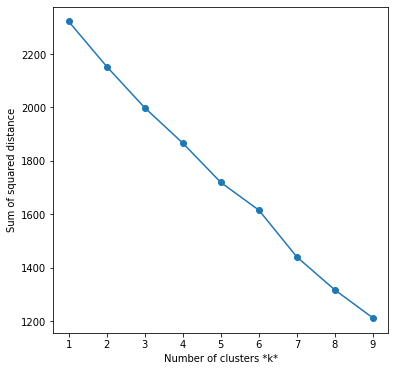

In [ ]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clus_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
# add clustering labels
clus_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

final_merged = df

final_merged = final_merged.join(clus_venues_sorted.set_index('name'), on='name')

final_merged.head()


,name,location.address,location.lat,location.lng,location.postalCode,location.city,rating,Level,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mikkeller Bar Viktoriagade,Viktoriagade 8 B-C,55.671878,12.557791,1655,København,9.4,top,0.0,Scandinavian Restaurant,Hostel,Convenience Store,Szechuan Restaurant,Thai Restaurant,Middle Eastern Restaurant,Burger Joint,Beer Bar,Grocery Store,Dumpling Restaurant
1,Ved Stranden 10 - Vinhandel & Bar,Ved Stranden 10,55.677262,12.581640,1061,København K,9.4,top,0.0,Scandinavian Restaurant,Wine Bar,Lounge,Coffee Shop,Steakhouse,Furniture / Home Store,Dive Bar,Dumpling Restaurant,Farmers Market,Fish Market
3,Garden Restaurant & Bar,Landemærket 57,55.683393,12.578076,1123,København,8.5,top,0.0,Tapas Restaurant,Art Gallery,Indie Movie Theater,Bistro,Breakfast Spot,Music Store,Gluten-free Restaurant,Farmers Market,Fish Market,Food & Drink Shop
4,Democratic Coffee Bar,Krystalgade 15,55.680876,12.573507,1172,København,8.5,top,1.0,Café,Library,Coffee Shop,Women's Store,Farmers Market,Fish Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store
5,Lord Nelson Bar,Hyskenstræde 9,55.677972,12.576802,1207,København K,8.5,top,0.0,Women's Store,Scandinavian Restaurant,Art Gallery,Australian Restaurant,Coffee Shop,Dessert Shop,Italian Restaurant,Jazz Club,Pedestrian Plaza,Yoga Studio


#### 8. Venue composition of top-rated bars


In [ ]:
top_bars = final_merged[final_merged['rating'] > 8]
top_bars =top_bars.drop(['location.address', 'location.lat', 'location.lng', 'location.postalCode', 'location.city', 'rating', 'Level', 'Cluster Labels'], axis = 'columns')
 
top_bars

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mikkeller Bar Viktoriagade,Scandinavian Restaurant,Hostel,Convenience Store,Szechuan Restaurant,Thai Restaurant,Middle Eastern Restaurant,Burger Joint,Beer Bar,Grocery Store,Dumpling Restaurant
1,Ved Stranden 10 - Vinhandel & Bar,Scandinavian Restaurant,Wine Bar,Lounge,Coffee Shop,Steakhouse,Furniture / Home Store,Dive Bar,Dumpling Restaurant,Farmers Market,Fish Market
3,Garden Restaurant & Bar,Tapas Restaurant,Art Gallery,Indie Movie Theater,Bistro,Breakfast Spot,Music Store,Gluten-free Restaurant,Farmers Market,Fish Market,Food & Drink Shop
4,Democratic Coffee Bar,Café,Library,Coffee Shop,Women's Store,Farmers Market,Fish Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store
5,Lord Nelson Bar,Women's Store,Scandinavian Restaurant,Art Gallery,Australian Restaurant,Coffee Shop,Dessert Shop,Italian Restaurant,Jazz Club,Pedestrian Plaza,Yoga Studio
6,Bo-Bi Bar,Dive Bar,Shoe Store,Men's Store,Clothing Store,Candy Store,Tea Room,Furniture / Home Store,Dumpling Restaurant,Farmers Market,Fish Market
7,K Bar,Scandinavian Restaurant,Wine Bar,Plaza,Lounge,Coffee Shop,Restaurant,Fried Chicken Joint,Dive Bar,Dumpling Restaurant,Farmers Market
8,Berlin Bar,Department Store,Indian Restaurant,Record Shop,Men's Store,Beer Garden,Fish Market,Women's Store,Gay Bar,Farmers Market,Food & Drink Shop
9,Charlies Bar,Clothing Store,Juice Bar,Men's Store,Scandinavian Restaurant,Shoe Store,Coffee Shop,Candy Store,Tea Room,Miscellaneous Shop,Vegetarian / Vegan Restaurant


To remove the rated bars with missing data location of the venues around:

In [ ]:
final_merged.dropna(axis=0, inplace = True)


To get the shape of the resulted data frame:

In [ ]:
final_merged.shape

(24, 19)

In [ ]:
final_merged['Cluster Labels'] = final_merged['Cluster Labels'].astype(int)

# Comparing the three different rating levels: 'top' 'middle' and 'low' with the obtained Cluster labels.


In [ ]:
showtime = final_merged[['name', 'Level', 'Cluster Labels']]
showtime

,name,Level,Cluster Labels
0,Mikkeller Bar Viktoriagade,top,0
1,Ved Stranden 10 - Vinhandel & Bar,top,0
3,Garden Restaurant & Bar,top,0
4,Democratic Coffee Bar,top,1
5,Lord Nelson Bar,top,0
6,Bo-Bi Bar,top,0
7,K Bar,top,0
8,Berlin Bar,top,0
9,Charlies Bar,top,0
10,Harbo Bar,middle,1


# 3. Visualizing venues in a map



In [ ]:
address = 'Copenhagen, DK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

55.6867243 12.5700724


In [ ]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Let's visualize in a map where are located the rated bars. Red circles correspond to high-rated bars (>8); orange for medium-rated bars (>7); blue for low-rated bars (=<7):


In [ ]:
map_cph2 = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# set color scheme for the clusters
def colorin(Level):
  if Level == 'top':
    return 'red'
  elif Level == 'middle':
    return 'orange'
  else:
    return 'blue'

# add markers to the map
markers_colors = []
for lat, lon, poi, lvl, cluster in zip(final_merged['location.lat'], final_merged['location.lng'], 
                                  final_merged['name'], final_merged['Level'], final_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Level ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colorin(lvl),
        fill=True,
        fill_color= colorin(lvl),
        fill_opacity=0.7).add_to(map_cph2)

map_cph2





Next, a map of the locations with a color code for the Cluster Labels obtained from the machine learning algorithm. Red = 0, Purple = 1, Light green = 2.

In [ ]:
map_cph1 = folium.Map(location=[latitude, longitude], zoom_start=12.5)
 
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
 
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_merged['location.lat'], final_merged['location.lng'], 
                                  final_merged['name'], final_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True) 

    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_cph1)       
map_cph1